In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# fonte dos dados (source): https://prefeitura.pbh.gov.br/saude/coronavirus
# > BOLETIM EPIDEMIOLÓGICO E ASSISTENCIAL
df = pd.read_csv('covid-bh.csv')
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-15,1088,NaN,NaN,29
1,2020-05-18,1189,156.0,1002.0,31
2,2020-05-19,1249,155.0,1061.0,33
3,2020-05-20,1249,NaN,NaN,35
4,2020-05-21,1316,187.0,1090.0,36
...,...,...,...,...,...
145,2020-12-14,57729,2255.0,53733.0,1741
146,2020-12-15,58000,2241.0,54006.0,1753
147,2020-12-16,58411,2352.0,54298.0,1761
148,2020-12-17,58787,2463.0,54551.0,1773


In [11]:
df.dtypes

DATA                  object
CONFIRMADOS            int64
EM ACOMPANHAMENTO    float64
RECUPERADOS          float64
ÓBITOS                 int64
dtype: object

In [12]:
df['ÓBITOS']

0        29
1        31
2        33
3        35
4        36
       ... 
145    1741
146    1753
147    1761
148    1773
149    1781
Name: ÓBITOS, Length: 150, dtype: int64

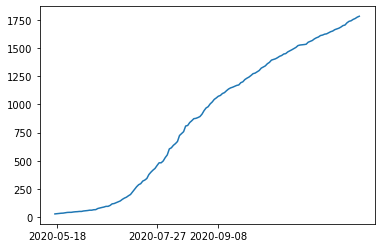

In [13]:
plt.xticks([1,50,80])
plt.plot(df['DATA'], df['ÓBITOS'])

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-18,1189,156.0,1002.0,31
1,2020-05-19,1249,155.0,1061.0,33
2,2020-05-21,1316,187.0,1090.0,36
3,2020-05-25,1444,275.0,1127.0,42
4,2020-05-26,1534,280.0,1211.0,43
...,...,...,...,...,...
138,2020-12-14,57729,2255.0,53733.0,1741
139,2020-12-15,58000,2241.0,54006.0,1753
140,2020-12-16,58411,2352.0,54298.0,1761
141,2020-12-17,58787,2463.0,54551.0,1773


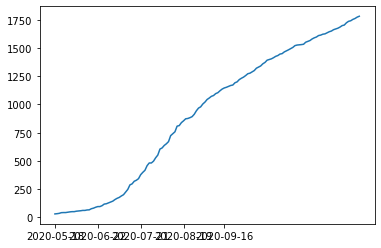

In [16]:
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['ÓBITOS'])

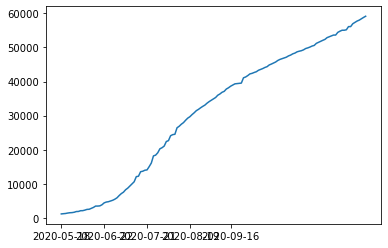

In [17]:
# if confirmed means confirmed infected now (accumulated infected - removed)
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['CONFIRMADOS'])

In [18]:
df['RECUPERADOSNOVOS'] = df['RECUPERADOS'].diff()
df['RECUPERADOSNOVOS'][0] = 0

<ipython-input-18-d5e2d50be54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECUPERADOSNOVOS'][0] = 0


In [19]:
df['RECUPERADOSNOVOS'][0]

0.0

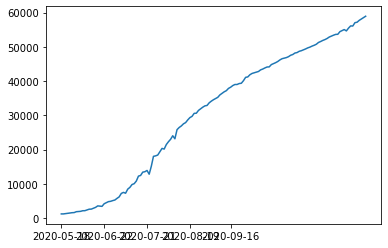

In [20]:
# if recovered means removed (recovered + dead) 
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)

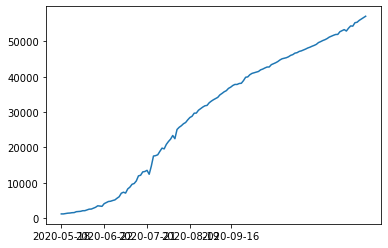

In [21]:
# if recovered really means recovered
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS'] - df['ÓBITOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)